# Determine top emerging beauty brands in China
This file aims to determine top 5 emerging beauty brands in the Chinese beauty market.<br>
The brands are selected based on how recent they were launched in China and how robust their growths have been.<Br>
The dataset are obtained from Passport, a market intelligence software.

## Import libraries

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

%matplotlib inline
sns.set_style('whitegrid')
plt.rcParams.update({'font.size':12})

## Import datasets

In [4]:
# import beauty and personal care dataset
df_beauty = pd.read_excel('sales.xls',encoding='utf-8',index=False,heading=None)
# drop na & reset heading
df_beauty.dropna(inplace=True)
df_beauty.reset_index(drop=True,inplace=True)
df_beauty.columns = df_beauty.iloc[0,:]
df_beauty = df_beauty.iloc[1:,:].copy()
# set geography & category
condition = (df_beauty.Geography == 'China') & (df_beauty.Category == 'Beauty and Personal Care')
df_beauty = df_beauty.loc[condition]
df_beauty.reset_index(drop=True,inplace=True)
# observe data
df_beauty.head()

,Geography,Category,Brand Name,Company Name (GBO),Data Type,Unit,2014,2015,2016,2017,2018,2019
0,China,Beauty and Personal Care,Aglaia (Jala (Group) Co Ltd),Jala (Group) Co Ltd,Retail Value RSP,CNY million,372,394.6,-,-,-,-
1,China,Beauty and Personal Care,AHC (Unilever Group),Unilever Group,Retail Value RSP,CNY million,-,-,-,618.2,834.6,-
2,China,Beauty and Personal Care,Artistry (Amway Corp),Amway Corp,Retail Value RSP,CNY million,4150.2,3871.8,3294.1,3000.6,3045.3,-
3,China,Beauty and Personal Care,Aupres (Shiseido Co Ltd),Shiseido Co Ltd,Retail Value RSP,CNY million,3299.5,3261.2,3502.3,3797.9,4162.2,-
4,China,Beauty and Personal Care,"Avène (Pierre Fabre SA, Laboratoires)","Pierre Fabre SA, Laboratoires",Retail Value RSP,CNY million,1419.9,1650.7,1724.9,1888.2,1865.5,-


In [5]:
# import premium beauty and personal care dataset
df_prem = pd.read_excel('prenium.xls',encoding='utf-8',index=False,heading=None)
# drop na & reset heading
df_prem.dropna(inplace=True)
df_prem.reset_index(drop=True,inplace=True)
df_prem.columns = df_prem.iloc[0,:]
df_prem = df_prem.iloc[1:,:].copy()
# set geography & category
condition = (df_prem.Geography == 'China') & (df_prem.Category == 'Premium Beauty and Personal Care')
df_prem = df_prem.loc[condition]
df_prem.reset_index(drop=True,inplace=True)
# observe data
df_prem.head()

,Geography,Category,Brand Name,Company Name (GBO),Data Type,Unit,2013,2014,2015,2016,2017,2018
0,China,Premium Beauty and Personal Care,Lancôme (L'Oréal Groupe),L'Oréal Groupe,Retail Value RSP,CNY million,3621.7,3799.6,4037.8,4384.1,5686.2,7809.9
1,China,Premium Beauty and Personal Care,Estée Lauder (Estée Lauder Cos Inc),Estée Lauder Cos Inc,Retail Value RSP,CNY million,3158.1,3401.6,3711.4,3832.2,5238.1,7179.7
2,China,Premium Beauty and Personal Care,Christian Dior (LVMH Moët Hennessy Louis Vuitt...,LVMH Moët Hennessy Louis Vuitton SA,Retail Value RSP,CNY million,2147.3,2362.2,2620.1,2942.2,4034.4,5684.8
3,China,Premium Beauty and Personal Care,Beautrio (Infinitus (China) Co Ltd),Infinitus (China) Co Ltd,Retail Value RSP,CNY million,1669.1,2273.8,2693.3,3503.7,3903.1,4273.9
4,China,Premium Beauty and Personal Care,Shiseido (Shiseido Co Ltd),Shiseido Co Ltd,Retail Value RSP,CNY million,1687.4,1653.1,1864.7,2205.9,2819.3,3727.9


In [6]:
# import mass beauty and personal care dataset
df_mass = pd.read_excel('mass.xls',encoding='utf-8',index=False,heading=None)
# drop na & reset heading
df_mass.dropna(inplace=True)
df_mass.reset_index(drop=True,inplace=True)
df_mass.columns = df_mass.iloc[0,:]
df_mass = df_mass.iloc[1:,:].copy()
# set geography & category
condition = (df_mass.Geography == 'China') & (df_mass.Category == 'Mass Beauty and Personal Care')
df_mass = df_mass.loc[condition]
df_mass.reset_index(drop=True,inplace=True)
# observe data
df_mass.head()

,Geography,Category,Brand Name,Company Name (GBO),Data Type,Unit,2013,2014,2015,2016,2017,2018
0,China,Mass Beauty and Personal Care,L'Oréal Paris (L'Oréal Groupe),L'Oréal Groupe,Retail Value RSP,CNY million,12696.1,12779.7,12841.5,12799,13118.9,14683.6
1,China,Mass Beauty and Personal Care,Pechoin (Shanghai Pehchaolin Daily Chemical Co...,Shanghai Pehchaolin Daily Chemical Co Ltd,Retail Value RSP,CNY million,2577.9,4010.1,5602.1,6871.1,8457.3,9785.6
2,China,Mass Beauty and Personal Care,"Head & Shoulders (Procter & Gamble Co, The)","Procter & Gamble Co, The",Retail Value RSP,CNY million,7380.1,7594.4,7494.7,7396.6,7707.6,8038.2
3,China,Mass Beauty and Personal Care,Chando (Jala (Group) Co Ltd),Jala (Group) Co Ltd,Retail Value RSP,CNY million,-,3676.9,4259.3,5168.4,6744.8,7689
4,China,Mass Beauty and Personal Care,"Olay (Procter & Gamble Co, The)","Procter & Gamble Co, The",Retail Value RSP,CNY million,8197,8040.3,7279.9,6366.2,6310.1,7411.4


## Selecting emerging brands

In [7]:
# convert CNY million to AUD million 
def conv_curr(x):
    if x == '-':
        return 0
    else:
        return round(x*0.21,1)
# change unit column to AUD million
def conv_aud(x):
    return 'AUD million'
# remove inf and 100s
def remove_no_growth(x):
    if x == (float('inf') or -100 or 100):
        return 0
    else:
        return round(x,1)

### Beauty and personal care category

In [13]:
# preprocess beauty dataset
dfb = df_beauty.copy()

for year in ['2014','2015','2016','2017','2018']:
    dfb['{}'.format(year)] = dfb['{}'.format(year)].map(lambda x: conv_curr(x))
    
dfb.Unit = dfb.Unit.apply(lambda x: conv_aud(x))

# calculate % growth in given year
dfb['14-15'] = (dfb['2018']-dfb['2014'])/dfb['2014']*100
dfb['15-16'] = (dfb['2018']-dfb['2015'])/dfb['2015']*100
dfb['16-17'] = (dfb['2018']-dfb['2016'])/dfb['2016']*100
dfb['17-18'] = (dfb['2018']-dfb['2017'])/dfb['2017']*100

years = ['14-15','15-16','16-17','17-18']
for period in years:
    dfb[period] = dfb[period].apply(lambda x: remove_no_growth(x))
    
#observe processed dataset
dfb.head()

,Geography,Category,Brand Name,Company Name (GBO),Data Type,Unit,2014,2015,2016,2017,2018,2019,14-15,15-16,16-17,17-18
0,China,Beauty and Personal Care,Aglaia (Jala (Group) Co Ltd),Jala (Group) Co Ltd,Retail Value RSP,AUD million,78.1,82.9,0.0,0.0,0.0,-,-100.0,-100.0,NaN,NaN
1,China,Beauty and Personal Care,AHC (Unilever Group),Unilever Group,Retail Value RSP,AUD million,0.0,0.0,0.0,129.8,175.3,-,0.0,0.0,0.0,35.1
2,China,Beauty and Personal Care,Artistry (Amway Corp),Amway Corp,Retail Value RSP,AUD million,871.5,813.1,691.8,630.1,639.5,-,-26.6,-21.4,-7.6,1.5
3,China,Beauty and Personal Care,Aupres (Shiseido Co Ltd),Shiseido Co Ltd,Retail Value RSP,AUD million,692.9,684.9,735.5,797.6,874.1,-,26.2,27.6,18.8,9.6
4,China,Beauty and Personal Care,"Avène (Pierre Fabre SA, Laboratoires)","Pierre Fabre SA, Laboratoires",Retail Value RSP,AUD million,298.2,346.6,362.2,396.5,391.8,-,31.4,13.0,8.2,-1.2


In [14]:
# select emerging brand from beauty category
dfb_top = dfb.loc[(dfb['2014']<=0)].sort_values('17-18',ascending=False).reset_index(drop=True).copy()
dfb_top.drop(['Geography','Category','Data Type'],axis=1,inplace=True)
dfb_top = dfb_top.iloc[[1],:]

### Premium beauty and personal care category

In [11]:
# preprocess premium beauty dataset
dfp = df_prem.copy()

for year in ['2013','2014','2015','2016','2017','2018']:
    dfp['{}'.format(year)] = dfp['{}'.format(year)].map(lambda x: conv_curr(x))
    
dfp.Unit = dfp.Unit.apply(lambda x: conv_aud(x))

dfp['14-15'] = (dfp['2015']-dfp['2014'])/dfp['2014']*100
dfp['15-16'] = (dfp['2016']-dfp['2015'])/dfp['2015']*100
dfp['16-17'] = (dfp['2017']-dfp['2016'])/dfp['2016']*100
dfp['17-18'] = (dfp['2018']-dfp['2017'])/dfp['2017']*100

for period in years:
    dfp[period] = dfp[period].apply(lambda x: remove_no_growth(x))

# observe processed dataset
dfp.head()

,Geography,Category,Brand Name,Company Name (GBO),Data Type,Unit,2013,2014,2015,2016,2017,2018,14-15,15-16,16-17,17-18
0,China,Premium Beauty and Personal Care,Lancôme (L'Oréal Groupe),L'Oréal Groupe,Retail Value RSP,AUD million,760.6,797.9,847.9,920.7,1194.1,1640.1,6.3,8.6,29.7,37.4
1,China,Premium Beauty and Personal Care,Estée Lauder (Estée Lauder Cos Inc),Estée Lauder Cos Inc,Retail Value RSP,AUD million,663.2,714.3,779.4,804.8,1100.0,1507.7,9.1,3.3,36.7,37.1
2,China,Premium Beauty and Personal Care,Christian Dior (LVMH Moët Hennessy Louis Vuitt...,LVMH Moët Hennessy Louis Vuitton SA,Retail Value RSP,AUD million,450.9,496.1,550.2,617.9,847.2,1193.8,10.9,12.3,37.1,40.9
3,China,Premium Beauty and Personal Care,Beautrio (Infinitus (China) Co Ltd),Infinitus (China) Co Ltd,Retail Value RSP,AUD million,350.5,477.5,565.6,735.8,819.7,897.5,18.5,30.1,11.4,9.5
4,China,Premium Beauty and Personal Care,Shiseido (Shiseido Co Ltd),Shiseido Co Ltd,Retail Value RSP,AUD million,354.4,347.2,391.6,463.2,592.1,782.9,12.8,18.3,27.8,32.2


In [23]:
# select emerging brands from premium beauty category
dfp_top = dfp.loc[(dfp['2014']==0)].reset_index(drop=True).copy()
dfp_top.drop(['Geography','Category','Data Type','2013'],axis=1,inplace=True)
dfp_top = dfp_top.iloc[[0,5,6],:]

### Mass beauty and personal care category

In [16]:
# preprocess mass beauty dataset
dfm = df_mass.copy()

for year in ['2013','2014','2015','2016','2017','2018']:
    dfm['{}'.format(year)] = dfm['{}'.format(year)].map(lambda x: conv_curr(x))
    
dfm.Unit = dfm.Unit.apply(lambda x: conv_aud(x))

dfm['14-15'] = (dfm['2015']-dfm['2014'])/dfm['2014']*100
dfm['15-16'] = (dfm['2016']-dfm['2015'])/dfm['2015']*100
dfm['16-17'] = (dfm['2017']-dfm['2016'])/dfm['2016']*100
dfm['17-18'] = (dfm['2018']-dfm['2017'])/dfm['2017']*100

for period in years:
    dfm[period] = dfm[period].apply(lambda x: remove_no_growth(x))

# observe processed dataset
dfm.head()

,Geography,Category,Brand Name,Company Name (GBO),Data Type,Unit,2013,2014,2015,2016,2017,2018,14-15,15-16,16-17,17-18
0,China,Mass Beauty and Personal Care,L'Oréal Paris (L'Oréal Groupe),L'Oréal Groupe,Retail Value RSP,AUD million,2666.2,2683.7,2696.7,2687.8,2755.0,3083.6,0.5,-0.3,2.5,11.9
1,China,Mass Beauty and Personal Care,Pechoin (Shanghai Pehchaolin Daily Chemical Co...,Shanghai Pehchaolin Daily Chemical Co Ltd,Retail Value RSP,AUD million,541.4,842.1,1176.4,1442.9,1776.0,2055.0,39.7,22.7,23.1,15.7
2,China,Mass Beauty and Personal Care,"Head & Shoulders (Procter & Gamble Co, The)","Procter & Gamble Co, The",Retail Value RSP,AUD million,1549.8,1594.8,1573.9,1553.3,1618.6,1688.0,-1.3,-1.3,4.2,4.3
3,China,Mass Beauty and Personal Care,Chando (Jala (Group) Co Ltd),Jala (Group) Co Ltd,Retail Value RSP,AUD million,0.0,772.1,894.5,1085.4,1416.4,1614.7,15.9,21.3,30.5,14.0
4,China,Mass Beauty and Personal Care,"Olay (Procter & Gamble Co, The)","Procter & Gamble Co, The",Retail Value RSP,AUD million,1721.4,1688.5,1528.8,1336.9,1325.1,1556.4,-9.5,-12.6,-0.9,17.5


In [19]:
# select emerging brand from mass beauty category
dfm_top = dfm.loc[(dfm['2014']==0)].reset_index(drop=True).copy()
dfm_top.drop(['Geography','Category','Data Type','2013'],axis=1,inplace=True)
dfm_top = dfm_top.iloc[[5],:]

### Combined emerging brands

In [21]:
# combine emerging brands from three different categories
df_top = pd.concat([dfb_top,dfp_top,dfm_top],sort=False)
df_top.sort_values('Brand Name',inplace=True)
df_top.iloc[2,0] = 'IOPE (AmorePacific Corp)'
df_top.reset_index(drop=True,inplace=True)
df_top

,Brand Name,Company Name (GBO),Unit,2014,2015,2016,2017,2018,2019,14-15,15-16,16-17,17-18
0,AHC (Unilever Group),Unilever Group,AUD million,0.0,0.0,0.0,129.8,175.3,-,0.0,0.0,0.0,35.1
1,Aveeno (Johnson & Johnson Inc),Johnson & Johnson Inc,AUD million,0.0,0.0,10.9,27.7,60.2,NaN,NaN,0.0,154.1,117.3
2,IOPE (AmorePacific Corp),AmorePacific Corp,AUD million,0.0,1.7,9.9,18.7,24.9,NaN,0.0,482.4,88.9,33.2
3,Nars (Shiseido Co Ltd),Shiseido Co Ltd,AUD million,0.0,0.0,0.0,16.6,30.7,NaN,NaN,NaN,0.0,84.9
4,SU:M37 (LG Household & Health Care Ltd),LG Household & Health Care Ltd,AUD million,0.0,0.0,65.1,113.1,162.9,NaN,NaN,0.0,73.7,44.0


## Growing trend of the emerging brands

In [24]:
# rearrange year columns into rows
df_top_year = df_top[['Brand Name','Company Name (GBO)','Unit','2014','2015','2016','2017','2018']]
df_top_year = df_top_year.melt(id_vars=['Brand Name','Company Name (GBO)','Unit'],
                               var_name="Year",value_name="Revenue").copy()
# rearrange period columns into rows
df_top_period = df_top[['Brand Name','Company Name (GBO)','Unit','14-15','15-16','16-17','17-18']]
df_top_period = df_top_period.melt(id_vars=['Brand Name','Company Name (GBO)','Unit'],
                               var_name="Period",value_name="% Growth").copy()

### Yearly brand growth

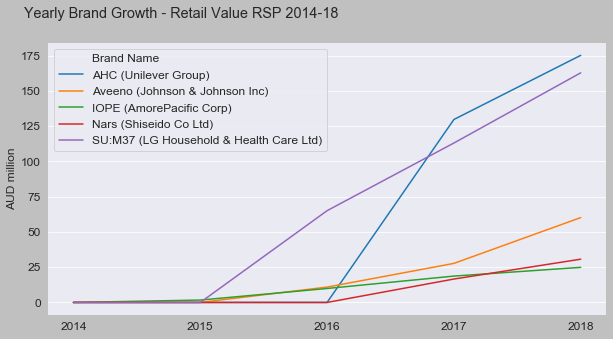

In [28]:
# plot yearly growth of emerging brands
sns.set_style('darkgrid')
fig,ax = plt.subplots(figsize=(10,5),facecolor='silver')
sns.lineplot(x='Year',y='Revenue',hue='Brand Name',data=df_top_year)
fig.suptitle('Yearly Brand Growth - Retail Value RSP 2014-18',x='0.31')
ax.set(ylabel='AUD million',xlabel='')
ax.xaxis.grid(False) 
ax.yaxis.grid(True) 
sns.despine(left=True,bottom=True)

### Recent growth

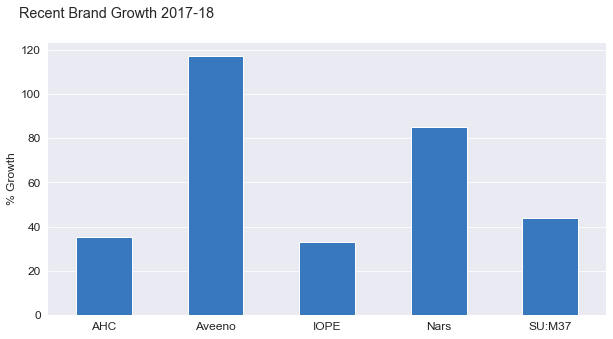

In [32]:
# plot recent growth of emerging brands
df_top_growth = df_top_period.loc[df_top_period.Period=='17-18'].copy()
def cut_company(x):
    for letter in x:
        if letter == '(':
            return x[:x.index(letter)-1]
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value
        # we change the bar width
        patch.set_width(new_value)
        # we recenter the bar
        patch.set_x(patch.get_x()-diff*0.5)
df_top_growth['Brand Name'] = df_top_growth['Brand Name'].map(lambda x: cut_company(x)).copy()
fig,ax = plt.subplots(figsize=(10,5))
df_top_growth.plot(kind='bar',x='Brand Name',y='% Growth',ax=ax,legend=False,color=sns.xkcd_rgb["windows blue"])
fig.suptitle('Recent Brand Growth 2017-18',x='0.22')
ax.set(ylabel='% Growth',xlabel='')
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
ax.xaxis.grid(False) 
ax.yaxis.grid(True) 
sns.despine(left=True,bottom=True)